## Loading Necessary Libraries

In [135]:
import warnings
warnings.filterwarnings('ignore')

In [136]:
#!pip install plotly, cufflinks

In [137]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly
from plotly import tools
from plotly.subplots import make_subplots #to add sublots
import plotly.express as px
init_notebook_mode(connected=True)

import cufflinks    # For iplot etc
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

pd.set_option('display.max_columns', 80)  # Change to higher value(150~) during analysis
pd.set_option('display.max_rows', 40)  # Change to higher value(80~) during analysis

In [138]:
# for aesthetic reasons
plt.style.use('ggplot')
sns.set_style('whitegrid')
green = '#009473'
red = '#dd4124'
blue = '#3780BF'
orange = '#FF9933'

## Loading Dataset & Overviewing

In [139]:
app_df = pd.read_csv('application_data.csv')

In [140]:
app_df.head(8)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,17.0,1,1,0,1,1,0,Acco

In [141]:
app_df.shape

(307511, 122)

In [142]:
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

In [143]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Checking Missing Values percentage

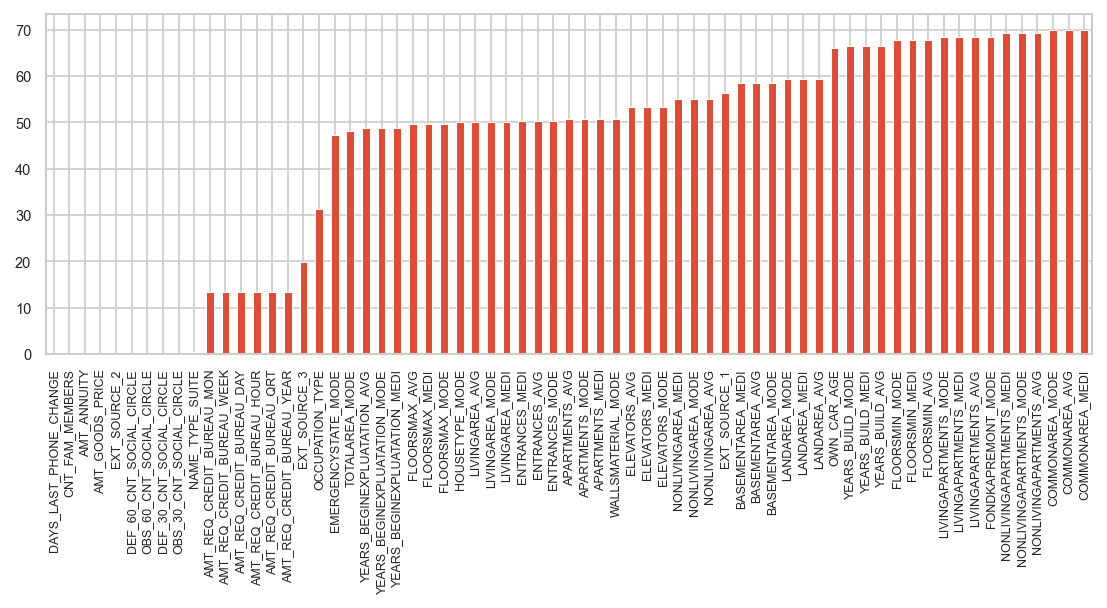

columns with null data: 67


In [144]:
null_data = app_df.isnull().sum()
null_data = 100*(null_data/app_df.shape[0]) #getting percentage 
null_data = null_data[null_data>0]
null_data.sort_values(inplace=True)
plt.figure(figsize=[9,3],dpi=150)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=7)

null_data.plot.bar()
plt.show()

print('columns with null data:',len(null_data))

In [145]:
hnull_data = app_df.isnull().sum()
hnull_data = hnull_data.apply(lambda x: (x/app_df.shape[0])*100) #getting percentage
hnull_data = hnull_data[hnull_data>35]
hnull_data.sort_values(ascending=False,inplace=True)
print(len(hnull_data), 'Columns with High missing Data')
hnull_data

49 Columns with High missing Data


COMMONAREA_AVG                  69.872297
COMMONAREA_MEDI                 69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
                                  ...    
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
Length: 49, dtype: float64

So there are 67 column with null values & 49 columns have above null values above 35%. We can drop them.

## Data Cleaning and Imputing Missing Values

In [146]:
# Remove columns having null values above 35%
def removeHNulls(dataframe,percent=0.35):
    df = dataframe.copy()
    in_shape = df.shape
    colnames = (df.isnull().sum()/len(df))
    colnames = list(colnames[colnames.values>=percent].index)
    df.drop(labels = colnames,axis =1,inplace=True)        
    print("Number of Columns dropped: ",len(colnames))    
    print("\nOld dataset Shape:",in_shape,"\nNew dataset Shape:",df.shape)
    return df

In [147]:
app_df = removeHNulls(app_df,0.35)

Number of Columns dropped:  49

Old dataset Shape: (307511, 122) 
New dataset Shape: (307511, 73)


In [148]:
# Rechecking null values in column
app_df.isnull().sum()/len(app_df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 73, dtype: float64

As we have removed all columns with more than 35% null values, remaining columns have low null values.
Columns having very low values can be imputed with mean, median etc in later stage.
### Let's Check different DataTypes in dataframe

In [149]:
app_df.dtypes.value_counts()

int64      41
float64    20
object     12
dtype: int64

So there are 41 int column, 20 float column, 12 columns are object.
Let's see content of those object columns.
### Let's Look into those object type columns First.

In [150]:
obj_col = app_df.dtypes[app_df.dtypes==np.object]
app_df[obj_col.index]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1


In [151]:
def print_value_count(col):
    for i in col:
        print(i,':\n',app_df[i].value_counts(dropna=False),sep='',end='\n--------------------------\n\n')

In [152]:
# Commented to keep analysis cleaner
# Uncomment to see result
#print_value_count(obj_col.index)

We can see 'NAME_FAMILY_STATUS' 'CODE_GENDER' 'OCCUPATION_TYPE''ORGANIZATION_TYPE' & 'NAME_TYPE_SUITE' has some values like XNA, NaN or unknown. We need to impute them later. Also we can see that 'OCCUPATION_TYPE' have 96391 NaN value, thats nearly 1/3rd of data. We need to look into it more to know the reason.

#### Imputing OCCUPATION_TYPE & ORGANIZATION_TYPE columns

For people with occupation type **'Pensioner' or 'Unemployed' or 'Student'**, for them 'ORGANIZATION_TYPE' & 'NAME_INCOME_TYPE' is not applicable most of times. So we can fill those columns having NaN or XNA with **Not Applicable**.

In [153]:
occupation_index = app_df[(((app_df['NAME_INCOME_TYPE']=='Pensioner')|(app_df['NAME_INCOME_TYPE']=='Student')|(app_df['NAME_INCOME_TYPE']=='Unemployed')) & (app_df['OCCUPATION_TYPE'].isnull()))].index
occupation_index = list(occupation_index)
organization_index = app_df[(((app_df['NAME_INCOME_TYPE']=='Pensioner')|(app_df['NAME_INCOME_TYPE']=='Student')|(app_df['NAME_INCOME_TYPE']=='Unemployed')) & (app_df['ORGANIZATION_TYPE']=='XNA'))].index
organization_index = list(organization_index)

In [154]:
app_df.loc[occupation_index,'OCCUPATION_TYPE'] = 'Not Applicable'
app_df.loc[organization_index,'ORGANIZATION_TYPE'] = 'Not Applicable'

# Though we can leave NaN as it is, But Occupation Type can be an important column during going application process.
# So we'll show NaN as Data Unavailable
app_df.OCCUPATION_TYPE.fillna(value='Data Unavailable', inplace=True)

If we look into remaining NaN values in Occupation Type & check corresponding Organization type, we can see diversity. If we imputed with mode(i.e Not applicable now) or in any way, it may lead to biasing in that particular category. We may fill those NaN values with 'Data Not Available'.

#### Imputing Gender column
We can see CODE_GENDER has 4 values with XNA value. We can impute those with mode of column

In [155]:
app_df.loc[app_df.CODE_GENDER == 'XNA','CODE_GENDER'] = app_df['CODE_GENDER'].mode()[0]
app_df.CODE_GENDER.value_counts(dropna=False)

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### Imputing any other columns having XNA value with np.NaN

In [156]:
# Replacing XNA with NaN
app_df = app_df.replace('XNA',np.NaN)

### Let's Look into Numerical Columns

In [157]:
numerical_col = app_df.dtypes[(app_df.dtypes==np.int64) | (app_df.dtypes==np.float)]
app_df[numerical_col.index]

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,15,0,0,0,0,0,0,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,8,0,0,0,0,0,0,0.115992,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,9,0,0,0,0,1,1,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,-931,1,1,0,1,0,0,2.0,2,2,9,0,0,0,1,1,0,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


There are 61 columns with numerical data. We can see some column staring with 'Days' have negative values. Those seem invalid. We also need to check possible NaN in all columns.

#### Dropping Columns with low information
There may be some column with 2-3 values, with 1-2 value having really low count. In that case that column will not provide much information for our analysis. We can drop those columns. Also columns having very high unique columns may not provide any useful info for analysis. One of such column is SK_ID_CURR. We can remove them since it won't do any help during analysis.

In [158]:
# Uncomment to test all columns
# Commented to keep analysis cleaner
#print_value_count(numerical_col.index)

In [159]:
drop_col = ['SK_ID_CURR','FLAG_DOCUMENT_21','FLAG_DOCUMENT_20','FLAG_DOCUMENT_19','FLAG_DOCUMENT_17','FLAG_DOCUMENT_12','FLAG_DOCUMENT_10','FLAG_DOCUMENT_7','FLAG_DOCUMENT_4','FLAG_DOCUMENT_2','FLAG_MOBIL']

In [160]:
app_df.drop(labels = drop_col,axis =1,inplace=True)

#### DAYS Column Treatment

In [161]:
# DAYS columns
days_col = [col for col in app_df if col.startswith('DAYS')]
days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

We can take absolute value & impute it in those columns.

In [162]:
# Negative value treatment
app_df[days_col]= abs(app_df[days_col])

In [163]:
# Converting 'DAYS_BIRTH' to years
app_df['AGE']= (app_df['DAYS_BIRTH']/365).astype(int)
app_df.drop(labels = 'DAYS_BIRTH',axis =1,inplace=True)
app_df['AGE'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [164]:
# Bining 'DAYS_BIRTH'
app_df['AGE_BIN']=pd.cut(app_df['AGE'], bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])
app_df.AGE_BIN.value_counts()

Middle_Age        185900
Young              75925
Senior_Citizen     29368
Very_Young         16318
Name: AGE_BIN, dtype: int64

#### Imputing some NaN columns with mode

We can impute the missing values of columns 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MONTH', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT' with the mode of those columns. These columns are number of credit inquiries, replacing missing values with the most frequent value would be acceptable approach.

In [165]:
amt_columns = [col for col in app_df if col.startswith('AMT_REQ_CREDIT_BUREAU')]
for i in amt_columns:
    app_df[i].fillna(app_df[i].mode()[0], inplace=True)

#### BINNING some variables

In [166]:
# Binning 'AMT_INCOME_RANGE' based on quantiles
app_df['AMT_INCOME_BIN'] = pd.qcut(app_df.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app_df['AMT_INCOME_BIN'].head(10)

0       MEDIUM
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5     VERY_LOW
6       MEDIUM
7    VERY_HIGH
8          LOW
9          LOW
Name: AMT_INCOME_BIN, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [167]:
# Binning 'AMT_CREDIT_RANGE' by creating various ranges
app_df['AMT_CREDIT_BIN'] = pd.qcut(app_df.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.97, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app_df['AMT_CREDIT_BIN'].head(10)

0          LOW
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5          LOW
6    VERY_HIGH
7         HIGH
8         HIGH
9          LOW
Name: AMT_CREDIT_BIN, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

## Analysis
### Checking for Outlier

#### Outlier in Total Income column

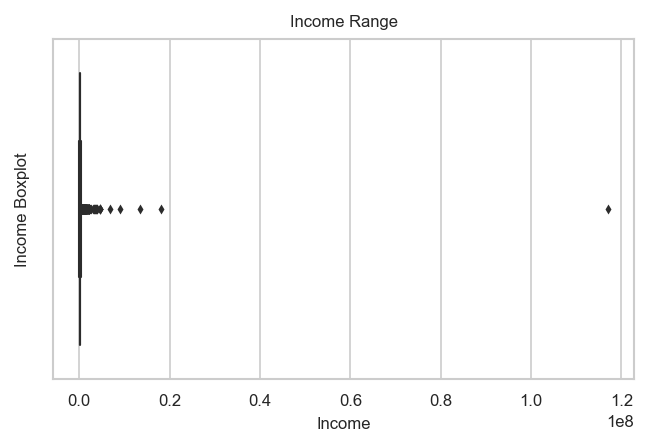

max value is: 117000000.0
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
0%       2.565000e+04
20%      9.900000e+04
50%      1.471500e+05
75%      2.025000e+05
95%      3.375000e+05
99%      4.725000e+05
100%     1.170000e+08
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


In [168]:
fig = plt.figure(figsize=(5,3),dpi=150)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)


box_income = sns.boxplot(data=app_df, x='AMT_INCOME_TOTAL', orient='h',fliersize=2,linewidth=1,color=green)
box_income.set_title('Income Range', fontsize=8)
box_income.set_ylabel('Income Boxplot',fontsize=8)
box_income.set_xlabel('Income',fontsize=8)


plt.show()
print('max value is:',np.quantile(app_df.AMT_INCOME_TOTAL,1))
print(app_df.AMT_INCOME_TOTAL.describe(percentiles=[0,0.2,0.5,0.75,0.95,0.99,1]))

From above we can clearly say that there are some outliers in very high income range. Max value is 117000000 which is way higher than even 99% quantile.

#### Outlier in AGE range

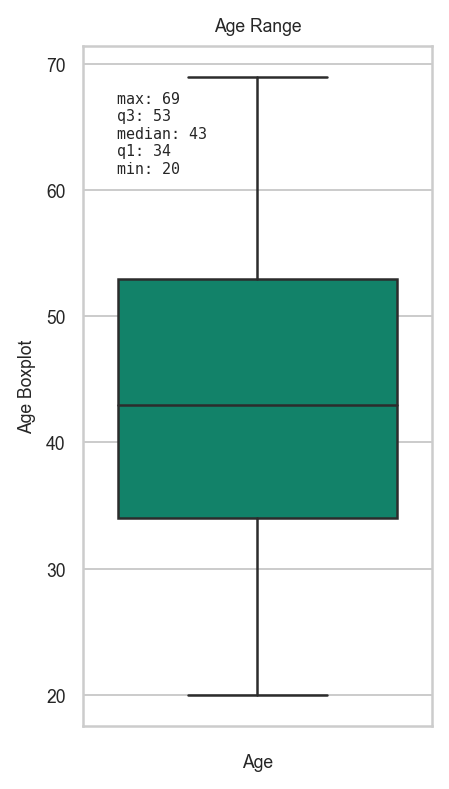

In [169]:

fig = plt.figure(figsize=(2.5,5),dpi=180)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)


box_income = sns.boxplot(data=app_df, y='AGE', orient='v',fliersize=2,linewidth=1,color=green)
box_income.set_title('Age Range', fontsize=7)
box_income.set_ylabel('Age Boxplot',fontsize=7)
box_income.set_xlabel('Age',fontsize=7)

age_quantile = np.quantile(app_df.AGE,[0,0.25,0.5,0.75,1])

fig.text(0.2,0.72,
'''
max: {4}
q3: {3}
median: {2}
q1: {1}
min: {0}
'''.format(int(age_quantile[0]),int(age_quantile[1]),int(age_quantile[2]),int(age_quantile[3]),int(age_quantile[4])),
         fontfamily='monospace',fontsize=6)
plt.show()

We don't see any outlier in AGE column.

#### Outlier in Days Employed Column

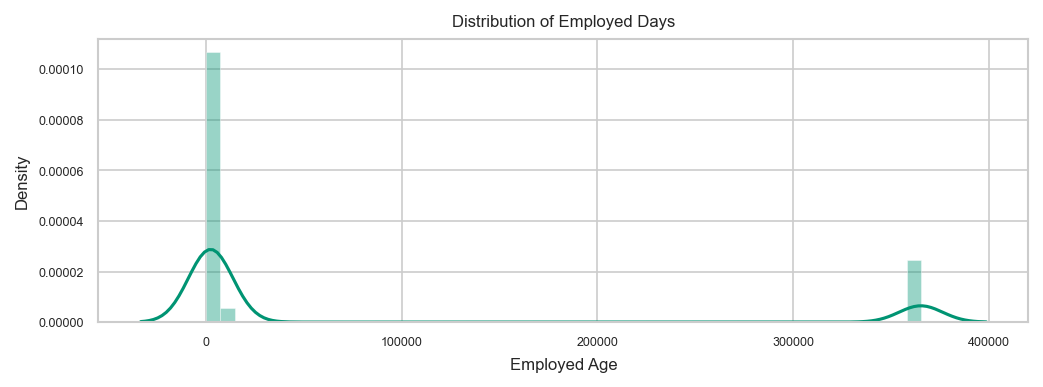

In [170]:
# distribution of 'DAYS_EMPLOYED'
fig = plt.figure(figsize=(8,2.5),dpi=150)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)

dist_employed = sns.distplot(app_df['DAYS_EMPLOYED'], color=green )
dist_employed.set_title('Distribution of Employed Days',fontsize=8)
dist_employed.set_ylabel('Density',fontsize=8)
dist_employed.set_xlabel('Employed Age',fontsize=8)
plt.show()

There are some entries > 300000. Those seems to be outliers because 300000 days equal to 821 year, that's humanly impossible. Also we have seen max age is 69 in previous Age Boxplot. One can't be employed more than his age.

#### Outlier in AMT_ANNUITY

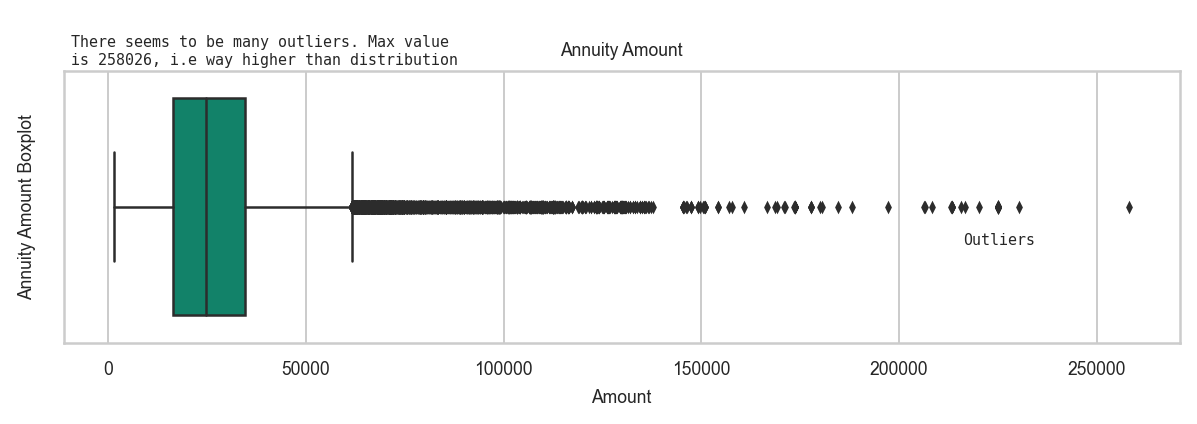

In [171]:
fig = plt.figure(figsize=(8,2),dpi=180)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)


box_annuity = sns.boxplot(data=app_df, x='AMT_ANNUITY', orient='h',fliersize=2,linewidth=1,color=green)
box_annuity.set_title('Annuity Amount', fontsize=7)
box_annuity.set_ylabel('Annuity Amount Boxplot',fontsize=7)
box_annuity.set_xlabel('Amount',fontsize=7)



fig.text(0.13,0.85,
'''
There seems to be many outliers. Max value
is {0}, i.e way higher than distribution
'''.format(round(app_df['AMT_ANNUITY'].describe()[7])),
         fontfamily='monospace',fontsize=6)
fig.text(0.75,0.35,
'''
Outliers
''', fontfamily='monospace',fontsize=6)

plt.show()

Loan annuity of 258026 seems too large if we compare with the data distribution. It may be an outlier.

#### Outlier in DAYS_REGISTRATION

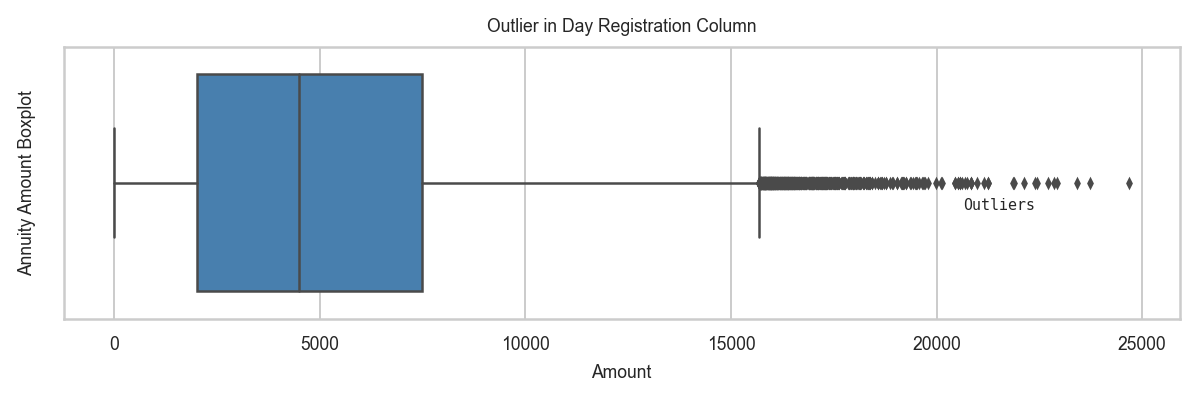

In [172]:
fig = plt.figure(figsize=(8,2),dpi=180)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)


box_annuity = sns.boxplot(data=app_df, x='DAYS_REGISTRATION', orient='h',fliersize=2,linewidth=1,color=blue)
box_annuity.set_title('Outlier in Day Registration Column', fontsize=7)
box_annuity.set_ylabel('Annuity Amount Boxplot',fontsize=7)
box_annuity.set_xlabel('Amount',fontsize=7)



fig.text(0.75,0.38,
'''
Outliers
''',fontfamily='monospace',fontsize=6)

plt.show()

### Let's look into Data distribution in different columns

#### Occupation Type distribution

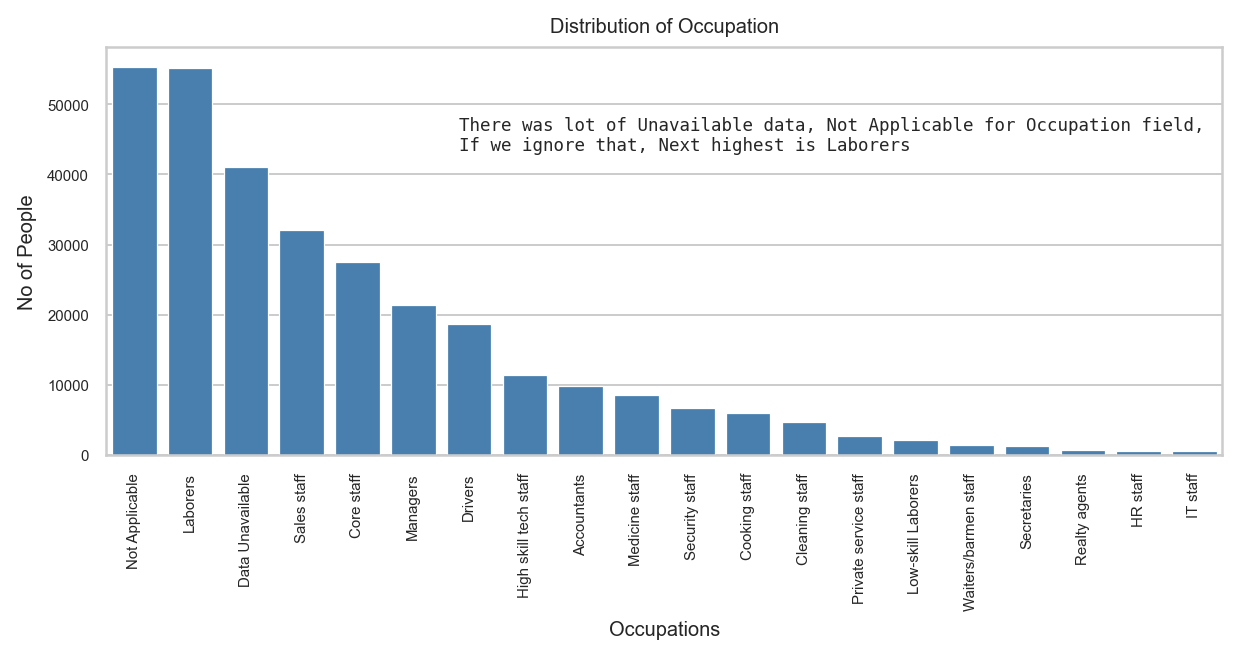

In [173]:
fig = plt.figure(figsize=(8,3),dpi=180)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)

occ_val = app_df['OCCUPATION_TYPE'].value_counts()
    
dist_occupation = sns.barplot(x=occ_val.index,y=occ_val, color=blue)
dist_occupation.set_title('Distribution of Occupation',fontsize=8)
dist_occupation.set_ylabel('No of People',fontsize=8)
dist_occupation.set_xlabel('Occupations',fontsize=8)
plt.xticks(rotation = 90)

fig.text(0.37,0.65,
'''
There was lot of Unavailable data, Not Applicable for Occupation field,
If we ignore that, Next highest is Laborers
''',
         fontfamily='monospace',fontsize=7)

plt.show()

Previously, we have imputed 'Not Applicable' & 'Data Unavailable' for many NaN values as per industry practice since lot of data was missing. Not taking those into consideration, Laborers, Sales staff, Core staff would make majority of constitution in occupation field.

#### Organization Type distribution

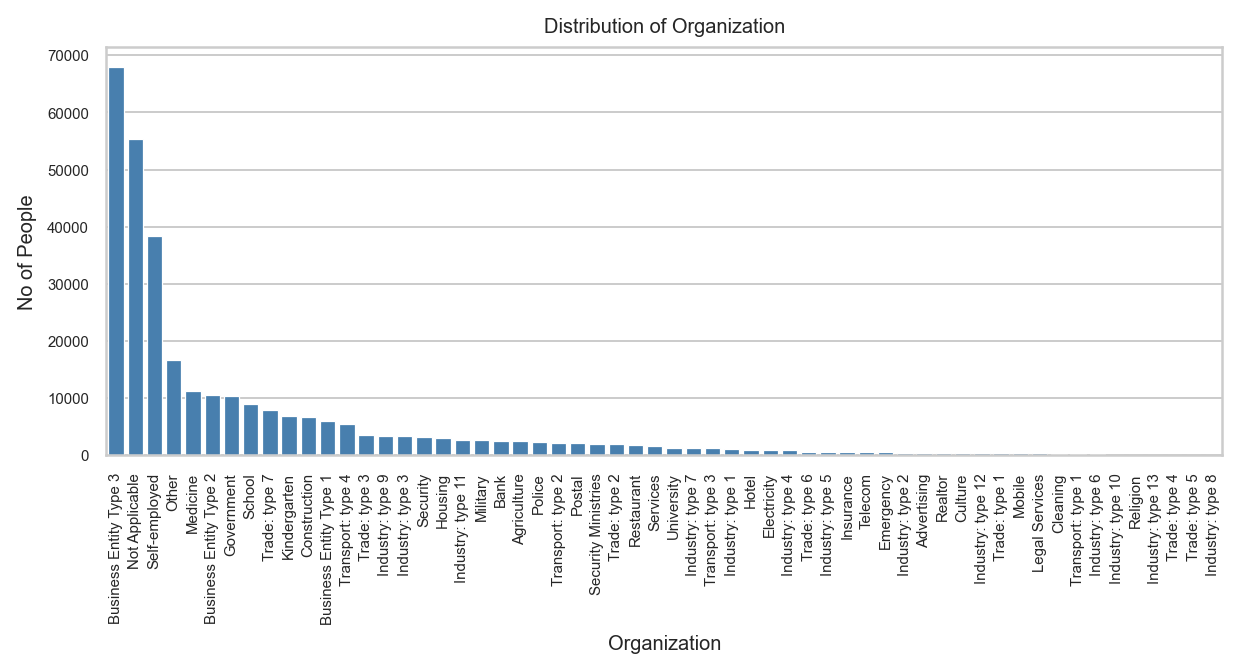

In [174]:
fig = plt.figure(figsize=(8,3),dpi=180)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)

org_val = app_df['ORGANIZATION_TYPE'].value_counts()
    
dist_occupation = sns.barplot(x=org_val.index,y=org_val, color=blue)
dist_occupation.set_title('Distribution of Organization',fontsize=8)
dist_occupation.set_ylabel('No of People',fontsize=8)
dist_occupation.set_xlabel('Organization',fontsize=8)
plt.xticks(rotation = 90)

plt.show()

We can see that 'Business Entity Type 3' has highest loan application. Next to is Not Applicable i.e mostly Pensoners who didn't fill this field & we have imputed this field as Not Applicable.

### Checking Data Imbalance

#### Checking Target Column

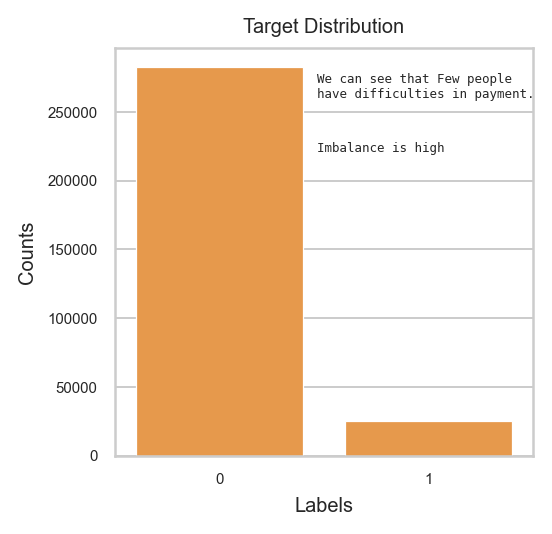

In [175]:
target_val = app_df["TARGET"].value_counts()

fig = plt.figure(figsize=(3,3),dpi=180)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)
   
dist_occupation = sns.barplot(x=target_val.index,y=target_val, color=orange)
dist_occupation.set_title('Target Distribution',fontsize=8)
dist_occupation.set_ylabel('Counts',fontsize=8)
dist_occupation.set_xlabel('Labels',fontsize=8)
plt.xticks(rotation = 0)

fig.text(0.5,0.76,
'''
We can see that Few people
have difficulties in payment.
''',fontfamily='monospace',fontsize=5)

fig.text(0.5,0.66,
'''
Imbalance is high
''',
         fontfamily='monospace',fontsize=5)
plt.show()

We can see that few people have difficulties in payment. If we look into ratio, it'll be close to 11:1. For further univariate & bi-variate analysis, we'll separate them.

#### Dividing Data based on Target variable value for further analysis

In [176]:
target0 = app_df[app_df.TARGET == 0]
target1 = app_df[app_df.TARGET == 1]

### Univariate Analysis

We'll 1st see univariate analysis of Categorical columns & then Numerical Columns.

#### Gender distribution

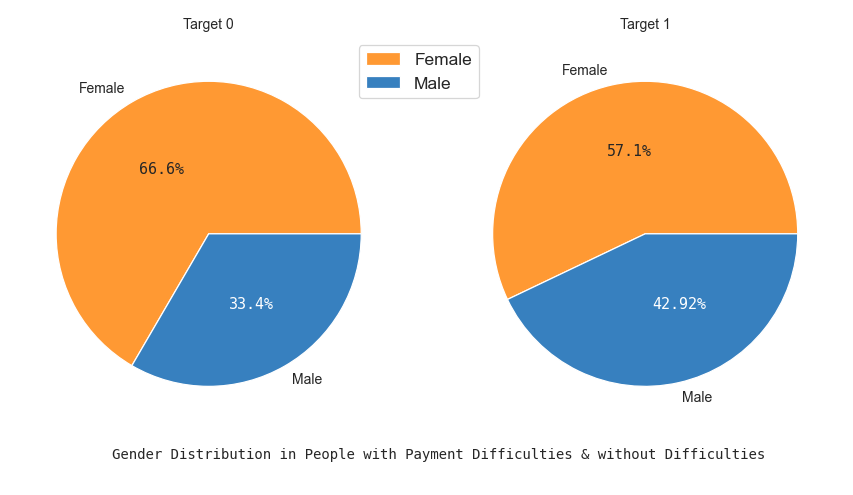

In [177]:
# Gender distribution of People with payment difficulties & without payment difficulties
target0_gender = target0["CODE_GENDER"].value_counts()
target1_gender = target1["CODE_GENDER"].value_counts()

fig = plt.figure(figsize=(5,2.5),dpi=180,tight_layout=True)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)
gs = fig.add_gridspec(1, 2)

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_title('Target 0',fontsize=5.6)
plt.xticks(rotation=0)
target0_pie = plt.pie(x=target0_gender,colors=[orange,blue],
                     labels=['Male' if i=='M' else 'Female' for i in target0_gender.index],
                     textprops={'fontsize':5.6})
## Showing Percentage in pie chart
fig.text(0.28,0.28,
'''
{0}%
'''.format(round(100*(target0_gender['M']/target0_gender.sum()),2)),fontfamily='monospace',fontsize=6,c='white')

fig.text(0.18,0.58,
'''
{0}%
'''.format(round(100*(target0_gender['F']/target0_gender.sum()),1)),fontfamily='monospace',fontsize=6)




ax1 = fig.add_subplot(gs[0, 1])
ax1.set_title('Target 1',fontsize=5.6)
plt.xticks(rotation=0)
target1_pie = plt.pie(x=target1_gender,labels=['Male' if i=='M' else 'Female' for i in target1_gender.index],
                      colors=[orange,blue],textprops={'fontsize':5.6})
## Showing Percentage in pie chart
fig.text(0.75,0.28,
'''
{0}%
'''.format(round(100*(target1_gender['M']/target1_gender.sum()),2)),fontfamily='monospace',fontsize=6,c='white')
fig.text(0.70,0.62,
'''
{0}%
'''.format(round(100*(target1_gender['F']/target1_gender.sum()),1)),fontfamily='monospace',fontsize=6)


fig.text(0.15,-0.05,
'''
Gender Distribution in People with Payment Difficulties & without Difficulties
''',fontfamily='monospace',fontsize=5.6)

fig.legend(loc=[0.42,0.8], labels=['Female','Male'], fontsize='x-small')
plt.show()

In both cases Females are of higher percentage.

#### Income Source distribution

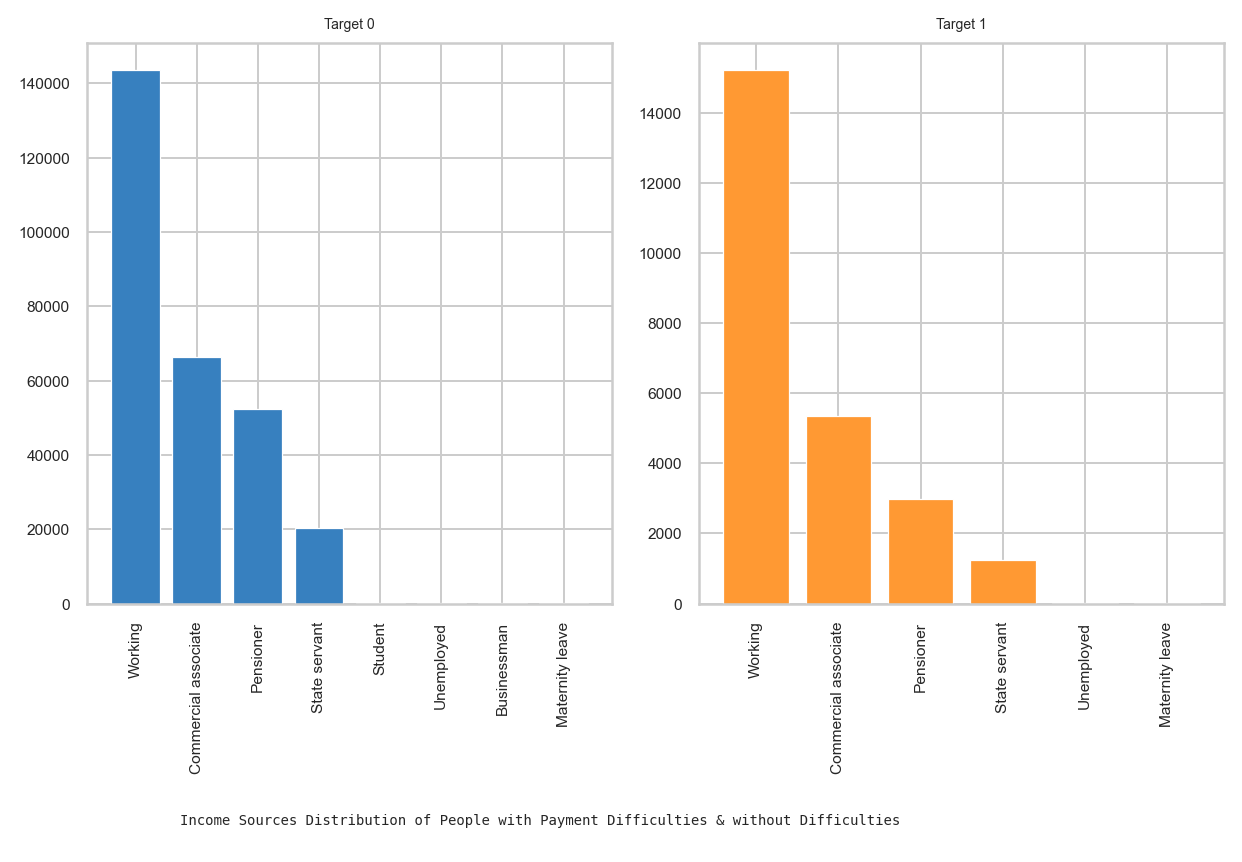

In [178]:
target0_income_type = target0["NAME_INCOME_TYPE"].value_counts()
target1_income_type = target1["NAME_INCOME_TYPE"].value_counts()


fig = plt.figure(figsize=(7,4.5),dpi=180,tight_layout=True)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)
gs = fig.add_gridspec(1, 2)

## Bar plot of Target 0
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_title('Target 0',fontsize=5.6)
plt.xticks(rotation=90,fontsize=6.2)
plt.yticks(fontsize=6.2)
target0_bar = plt.bar(x=target0_income_type.index,
                      height=target0_income_type,
                     color=blue)
                    
## Bar plot of Target 1
ax1 = fig.add_subplot(gs[0, 1])
ax1.set_title('Target 1',fontsize=5.6)
plt.xticks(rotation=90,fontsize=6.2)
plt.yticks(fontsize=6.2)
target1_bar = plt.bar(x=target1_income_type.index,
                      height=target1_income_type,
                     color=orange)


fig.text(0.15,-0.05,
'''
Income Sources Distribution of People with Payment Difficulties & without Difficulties
''',fontfamily='monospace',fontsize=5.6)
plt.show()

We can see similar type of distribution of different working class in both Target 0 & Target 1 dataframe.

#### Family Status Distribution

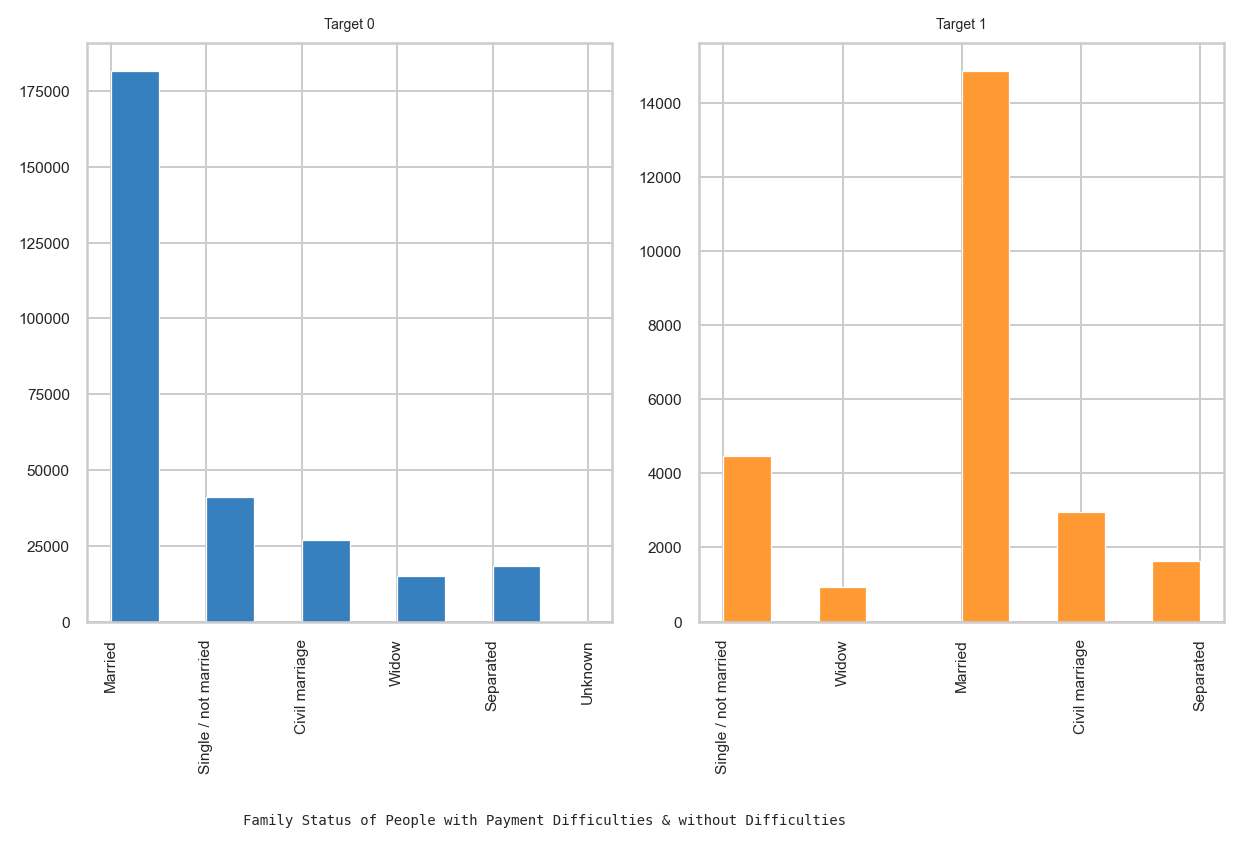

In [179]:
fig = plt.figure(figsize=(7,4.5),dpi=180,tight_layout=True)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)
gs = fig.add_gridspec(1, 2)

## Bar plot of Target 0
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_title('Target 0',fontsize=5.6)
plt.xticks(rotation=90,fontsize=6.2)
plt.yticks(fontsize=6.2)
target0_hist = plt.hist(x=target0["NAME_FAMILY_STATUS"],
                      color=blue)
                    
## Bar plot of Target 1
ax1 = fig.add_subplot(gs[0, 1])
ax1.set_title('Target 1',fontsize=5.6)
plt.xticks(rotation=90,fontsize=6.2)
plt.yticks(fontsize=6.2)
target1_hist = plt.hist(x=target1["NAME_FAMILY_STATUS"],
                      color=orange)


fig.text(0.2,-0.05,
'''
Family Status of People with Payment Difficulties & without Difficulties
''',fontfamily='monospace',fontsize=5.6)
plt.show()

In both Target 0 & Target 1, Married people applied for loan for max times. Single & Civil Marriage percentage is higher in Target 1, i.e with payment difficulties.

#### Distribution in Education column

In [180]:
target0_edu = target0["NAME_EDUCATION_TYPE"].value_counts()
target1_edu = target1["NAME_EDUCATION_TYPE"].value_counts()

In [181]:
edu0_df = pd.DataFrame({'labels': target0_edu.index,'values': target0_edu.values})
edu0_df.iplot(kind='pie',labels='labels',values='values',
              title='Education of Target 0', hole = 0.4)

In [182]:
edu1_df = pd.DataFrame({'labels': target1_edu.index,'values': target1_edu.values})
edu1_df.iplot(kind='pie',labels='labels',values='values',
              title='Education of Target 1', hole = 0.4)

We see Increase in percentage of people having Secondary/Secondary special education with payment difficulties. However Higher educated people's percentage decreased with payment difficulties.

#### Income Range Distribution

In [183]:
target0_inc = target0["AMT_INCOME_BIN"].value_counts()
target1_inc = target1["AMT_INCOME_BIN"].value_counts()

In [184]:
inc0_df = pd.DataFrame({'labels': target0_inc.index,'values': target0_inc.values})
inc0_df.iplot(kind='pie',labels='labels',values='values', title='Income range of Target 0', hole = 0.5)

In [185]:
inc1_df = pd.DataFrame({'labels': target1_inc.index,'values': target1_inc.values})
inc1_df.iplot(kind='pie',labels='labels',values='values', title='Income range of Target 1', hole = 0.5)

We didn't see much changes in percentage for Target 0 & Target 1.

#### Distribution of Age

In [186]:
target0_age = target0["AGE_BIN"].value_counts()
target1_age = target1["AGE_BIN"].value_counts()

In [187]:
age0_df = pd.DataFrame({'labels': target0_age.index,'values': target0_age.values})
age0_df.iplot(kind='pie',labels='labels',values='values', title='Age distribution of Target 0', hole = 0.5)

In [188]:
age1_df = pd.DataFrame({'labels': target1_age.index,'values': target1_age.values})
age1_df.iplot(kind='pie',labels='labels',values='values', title='Age distribution of Target 1', hole = 0.5)

We see increase in percentage of Young People, all other age group saw an decrease in percentage.

In [189]:
# Function for univariate plots
def uni(df,col,hue =None):
    fig = plt.figure(figsize=(6,3),dpi=180,tight_layout=True)
    plt.rc('xtick', labelsize=9)
    plt.rc('ytick', labelsize=9)
    gs = fig.add_gridspec(1, 2)
    
    ax0 = fig.add_subplot(gs[0, 0])
    plt.xticks(rotation=0,fontsize=5.8)
    plt.yticks(fontsize=5.8)
    ax0.set_title("Distribution Plot",fontsize=5.8)
    ax0.set_xlabel(col,fontsize=5.8)
    ax0.set_ylabel('Density',fontsize=5.8)
    
    ax1 = fig.add_subplot(gs[0, 1])
    plt.xticks(rotation=0,fontsize=5.8)
    plt.yticks(fontsize=5.8)
    ax1.set_title("Box Plot",fontsize=5.8)
    ax1.set_xlabel(col,fontsize=5.8)
    
    sns.distplot(df[~df[col].isna()][col],ax=ax0, color=blue)
    sns.boxplot(data =df, x=col,ax=ax1,orient='v', color=green,fliersize=2,linewidth=0.5)
    
    plt.show()

#### Distribution of AMT_ANNUITY

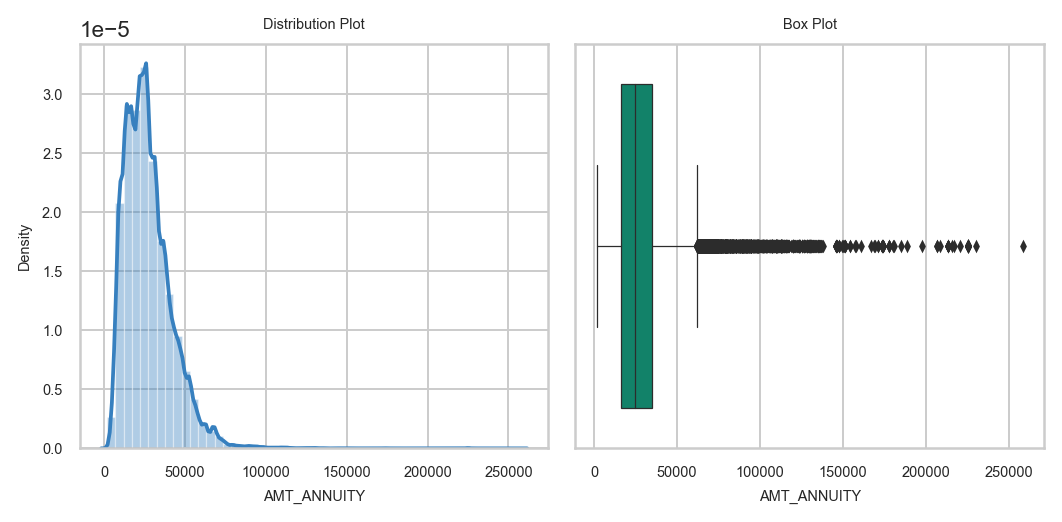

In [190]:
uni(df=target0,col='AMT_ANNUITY')

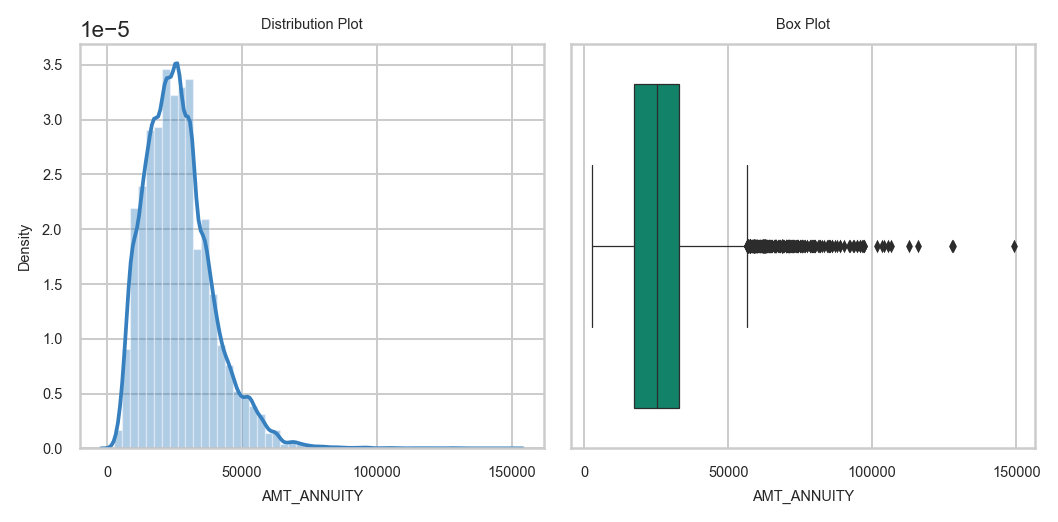

In [191]:
uni(df=target1,col='AMT_ANNUITY')

There seems to be some outliers in both Target 0 & Target 1.

#### Distribution of AMT_CREDIT

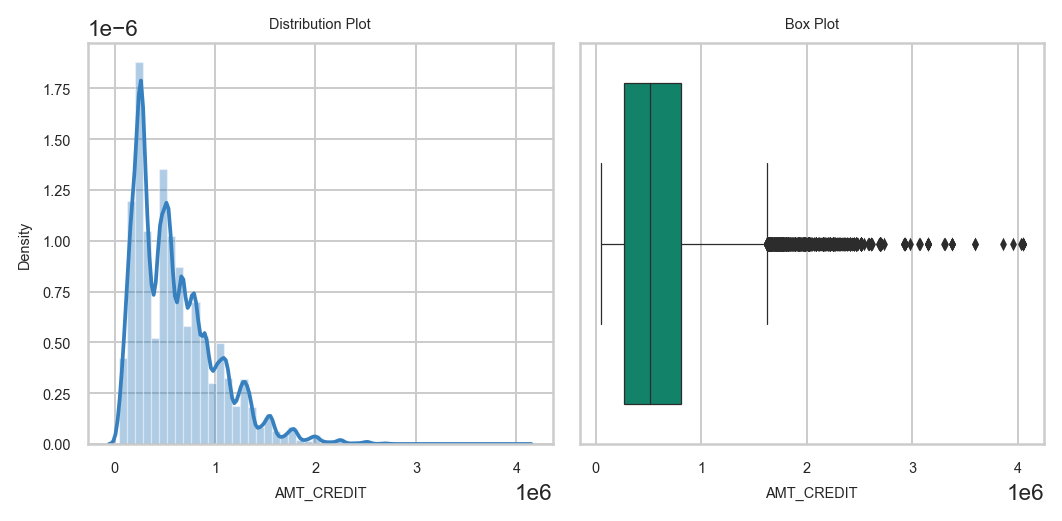

In [192]:
uni(df=target0,col='AMT_CREDIT')

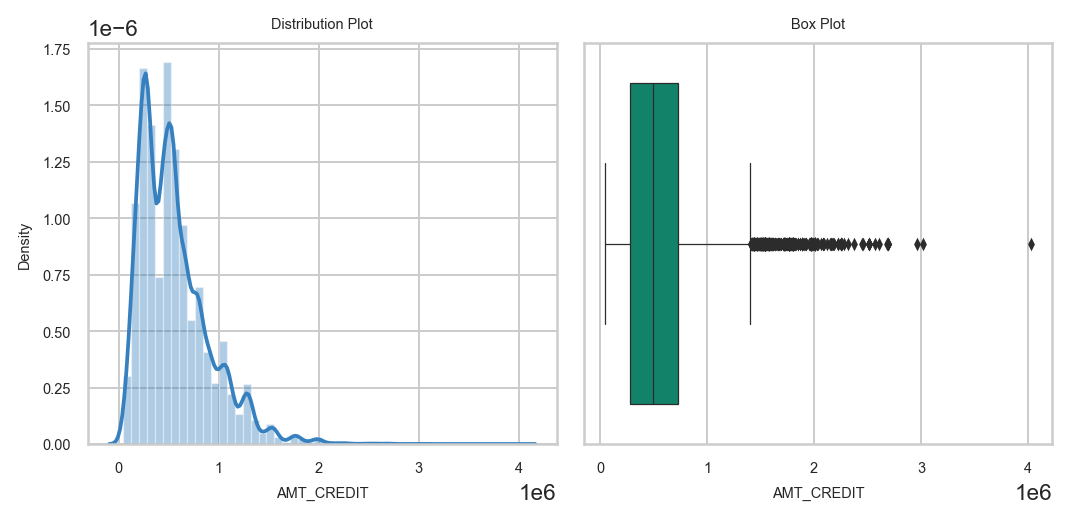

In [193]:
uni(df=target1,col='AMT_CREDIT')

Distribution curve doesn't seem to be a normal distribution/ bell shaped. There are outliers in both Targe 0 & Target 1.

## Bivariate Analysis

### Between Credit amount & Education

In [194]:
# Function for Bivariate analysis
def bivar(df,x,y,hue,xlabel,ylabel,title,logscale=False):
    fig = plt.figure(figsize=(12,7),dpi=180)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.xticks(rotation=45)
    if logscale:
        plt.yscale('log')
    df_box = sns.boxplot(data =df, x=x,y=y, hue =hue,orient='v', 
               fliersize=2,linewidth=1)
    df_box.set_title(title)
    df_box.set_ylabel(ylabel,fontsize=12)
    df_box.set_xlabel(xlabel,fontsize=12)
    plt.show()

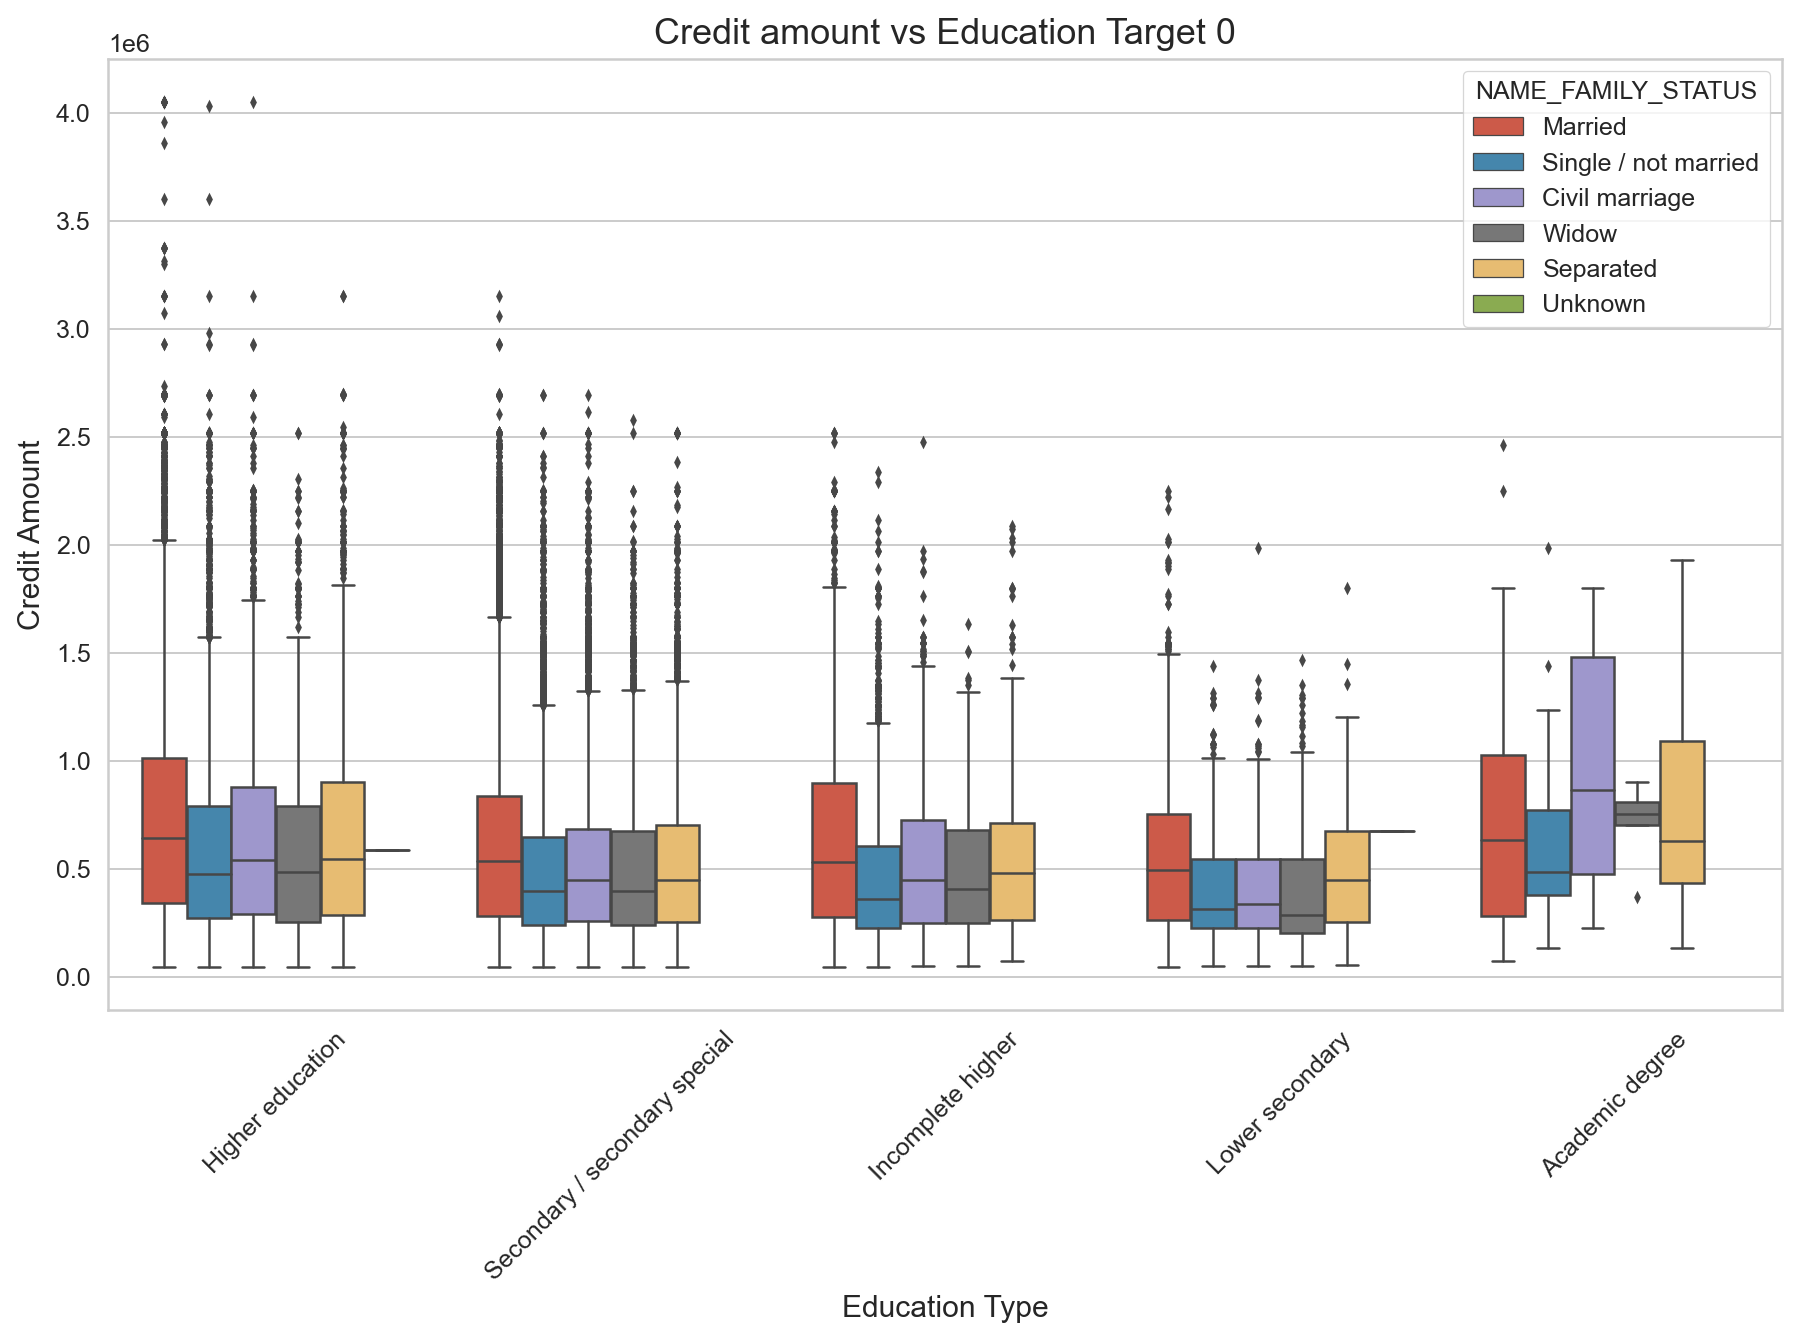

In [195]:
bivar(target0,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS',
      title='Credit amount vs Education Target 0',
     xlabel='Education Type',ylabel='Credit Amount')

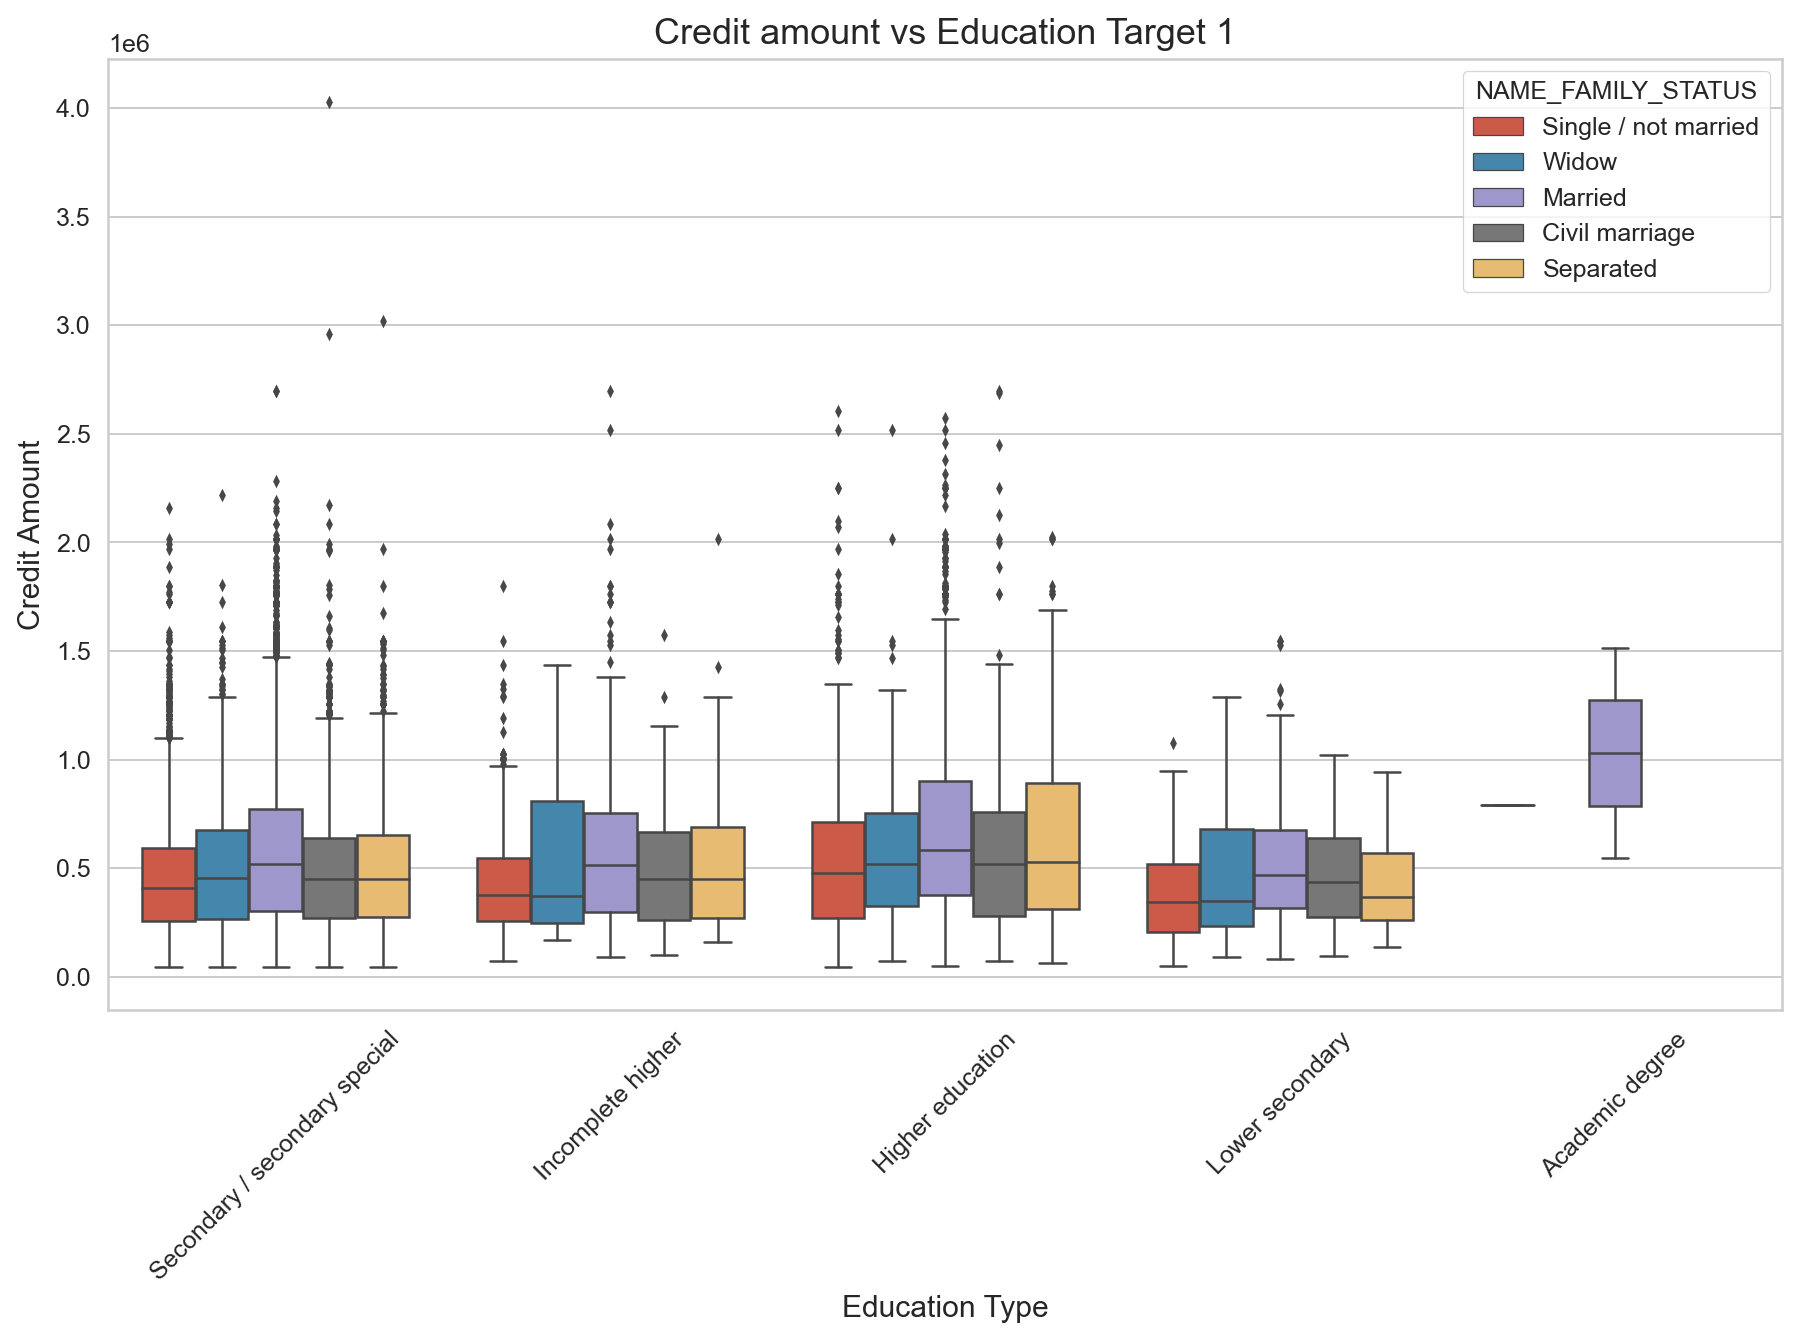

In [196]:
bivar(target1,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS',
      title='Credit amount vs Education Target 1',
     xlabel='Education Type',ylabel='Credit Amount')

#### Inference

- **For target 0**:
  1. We can see that Higher Education, Incomplete Higher & Secondary Education have higher outlier in all marital status. For Academic degree, with civil marriage & Separated marital status cases have most credit in third quartile.
  2. Also people with  Academic Degree, except single & widow marital status people, other have more credit amount.

- **For Target 1**:
  1. We can see that People with payment difficulties, Married & with Academic education, they have low credit amount.
  2. People with Lower Secondary Education have very few outlier. So the credit amount is mostly uniform.
  3. People with Incomplete Higher education with 'Widow' marital status have a longer third quartile. That is also the case with people with Lower Secondary Education.

### Between Income & Education Status

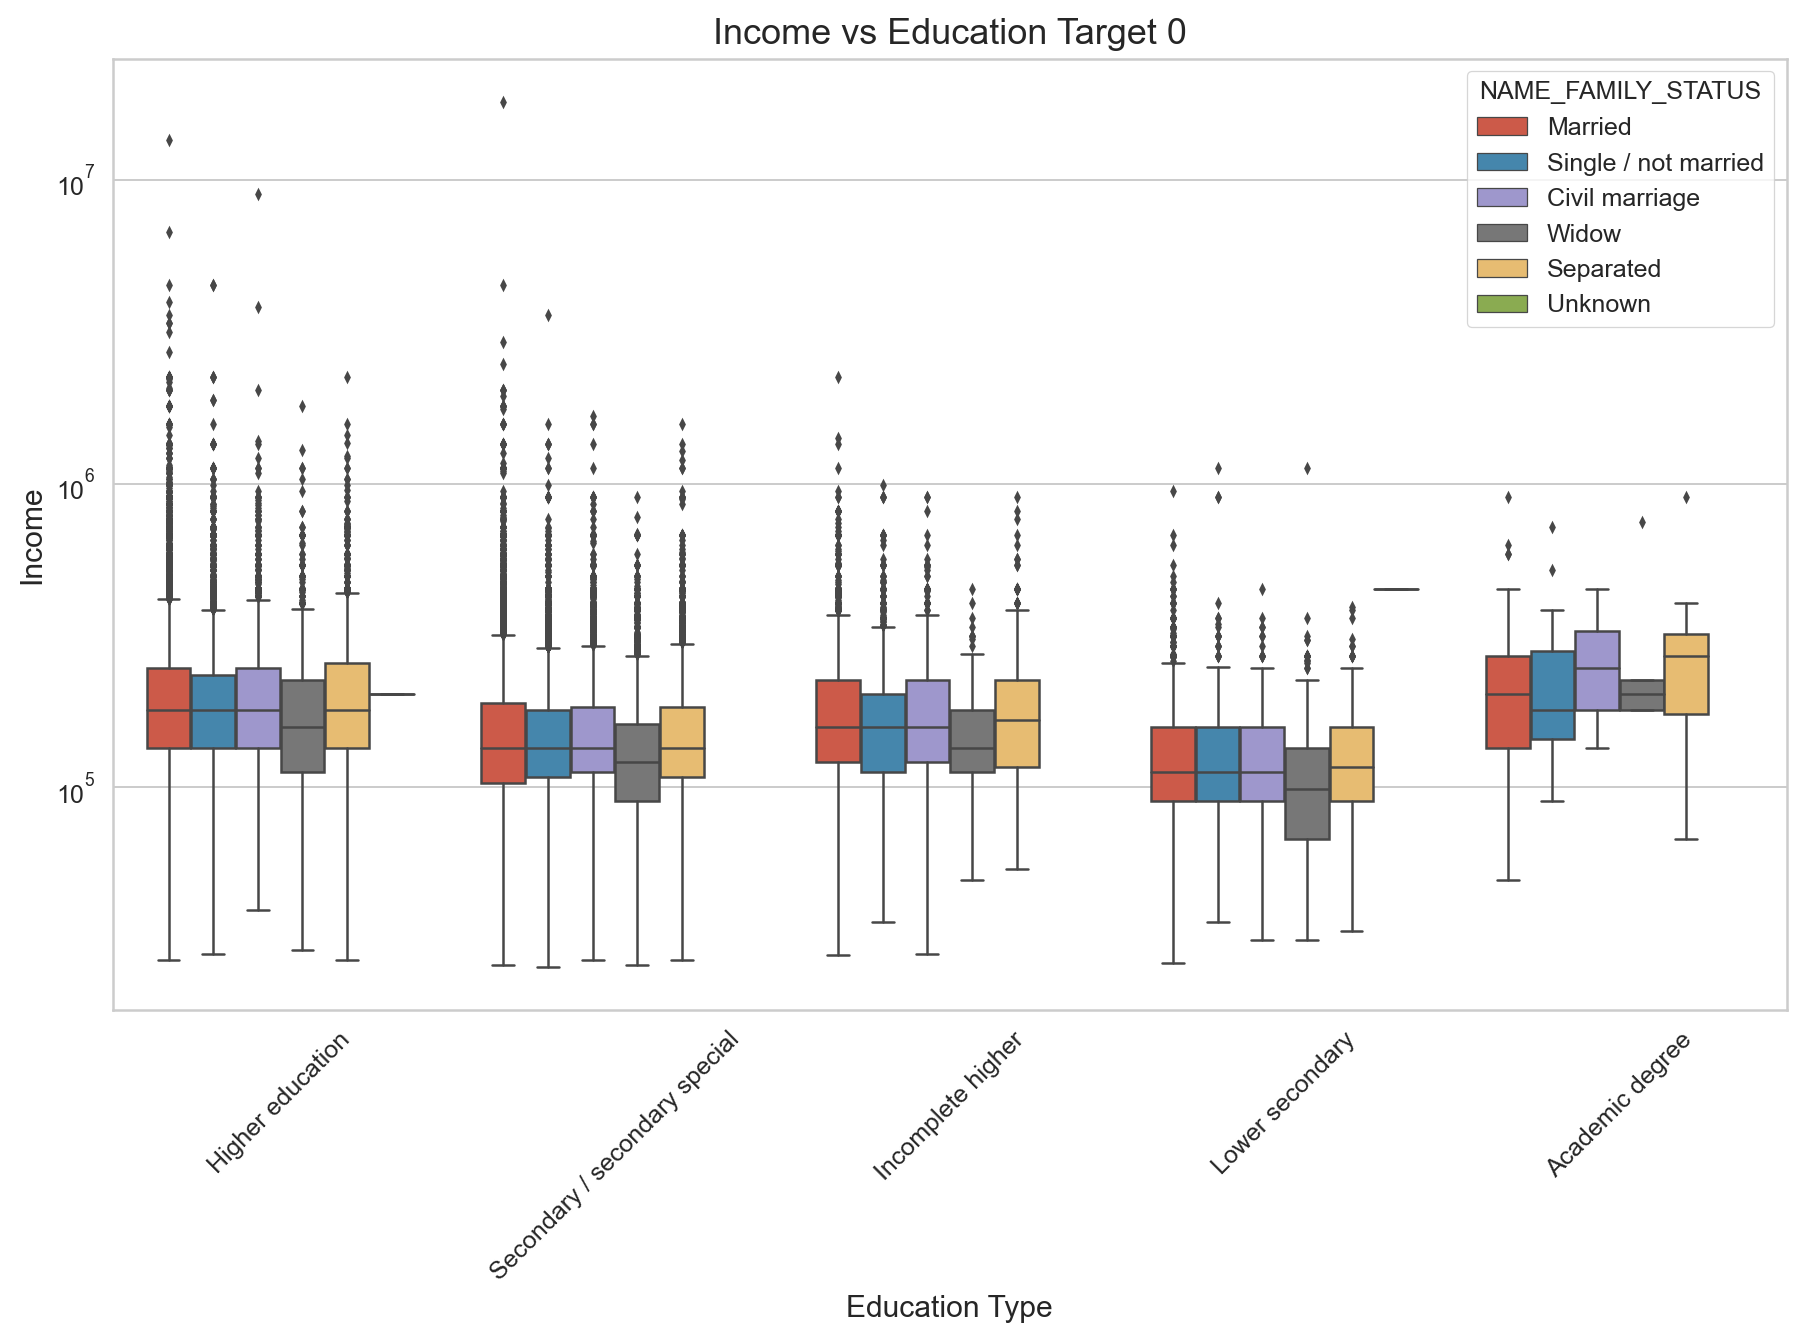

In [197]:
bivar(target0,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue='NAME_FAMILY_STATUS',
      title='Income vs Education Target 0',
     xlabel='Education Type',ylabel='Income',logscale=True)

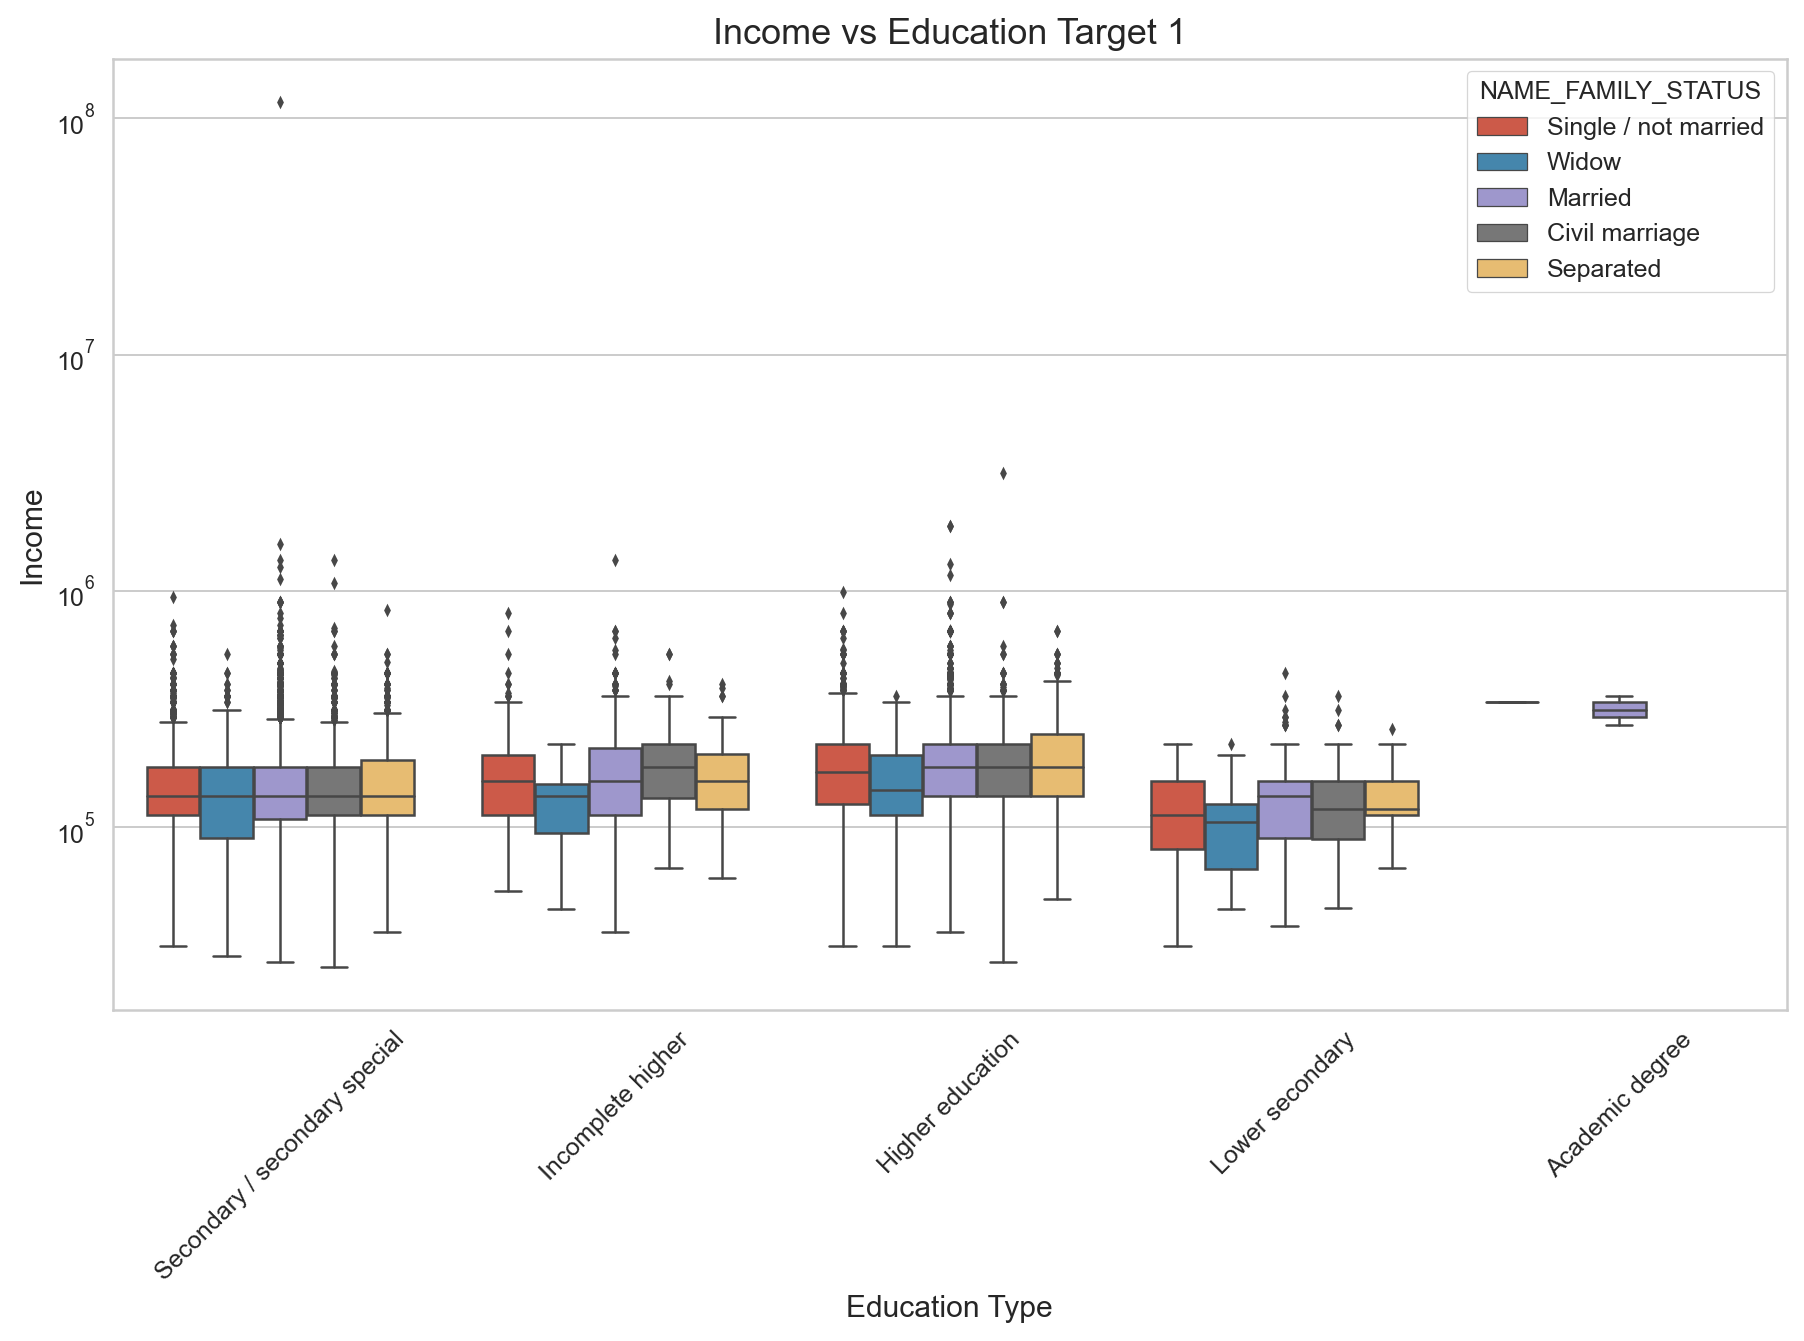

In [198]:
bivar(target1,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue='NAME_FAMILY_STATUS',
      title='Income vs Education Target 1',
     xlabel='Education Type',ylabel='Income',logscale=True)

#### Inference:

- **For Target 0:**
  1. People with Higher education have lot of outlier. While People with Academic Degree have few outliers.
  2. People with Widow Marital status have comparatively lower income in same Education type group.
  3. People with Academic Degree have more people in 1st quartile for 'Separated' marital status.
- **For Target 1:**
  1. Very few people, mostly married, with Academic Degree have payment difficulties after applying loan.
  2. People with Secondary & Higher Education have mostly outliers.
  3. Widow people have less income in most cases.

### Correlation between variables With Payment difficulties.

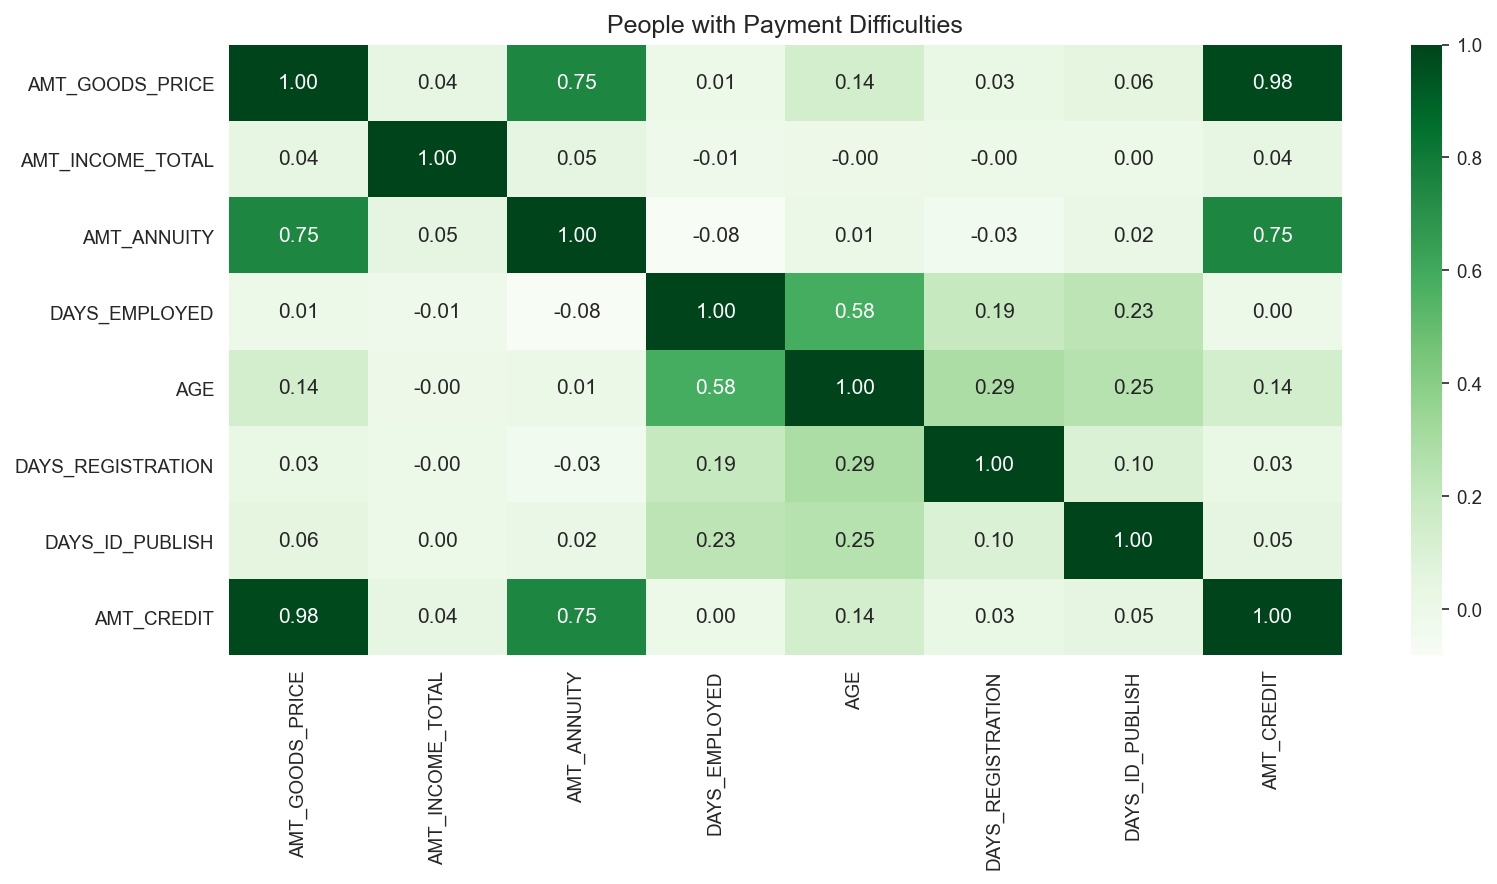

In [229]:
corr = target1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED',
  'AGE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson')

plt.figure(figsize=(11,6),dpi=150,tight_layout=True)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)

sns.heatmap(data=corr,annot=True,fmt='.2f',cmap='Greens')
plt.title('People with Payment Difficulties',fontsize=12)
plt.show()

The above heatmap shows correlation for clients with payment difficulties.

## Insights

### For Application data